# Introduccion
Un filtro muy utilizado en comunicaciones digitales es el filtro de caıda
cosenoidal definido por
$$g(t) = sinc (t/T) \frac{cos (\pi\beta t/T)}{
1 − 4\beta^2 t^2/T^2} $$ 

- Sea $g[n] = g(nT_s)$ con $1/T_s$  la frecuencia de sobremuestreo (i.e.,
$T/T_s$ = M con M entero, por ejemplo M = 8).

- Utilizar la autofuncion $e^{j2\pi fT_sn}$ para obtener por simulacion la
respuesta $|G(e^{j2\pi fT_s} )|$ en funcion de $2\pi fT_s$ con $|f| < 1/T$ para $\beta = 1$.
- Sea $x[n] = \sum^{PL−1}_{k=0} a[k]\delta[n − kM]$ con $a[k]\epsilon {±1}$ siendo un proceso
aleatorio blanco con sımbolos equiprobables. Determine por simulacion
la señal de salida y genere el diagrama ojo. Repita para $\beta$ = 0,1 y 0,5.

# Desarrollo 
Defino funciones generadoras

In [91]:
%matplotlib inline

In [92]:
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] =  12,8
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['font.size']=12

In [93]:
fB = 32e9;	# Velocidad de simbolos (baud rate)
T = 1/fB; # Tiempo entre simbolos
M = 8;  #Factor de sobremuestreo
fs = fB*M;	# Sample rate

beta = 1#; %Factor de roll-off
L = 20;  # 2*L*M+1 es el largo del filtro sobremuestreado
t = np.arange(-L,L,1./M)*T#[-L:1/M:L]*T;
n_delay_filter = L*M# %Retardo del filtro
def gen_filter():
    return [np.sinc(t2/T)*np.cos(np.pi*beta*t2/T)/
                         (1-4*beta**2*t2**2/T**2) 
            for t2 in t];
    
gn=gen_filter()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars


In [94]:
def sweep_omega():
    Omega = np.arange(0,1,1./2**8)*np.pi;
    N = 1000;
    H_Mag=[]                  
    H_Fase=[]
    for omega in Omega:
        xn = [np.exp(np.complex(0,omega*n)) for n in xrange(N)];
        yn = np.convolve(xn,gn);
        H_Mag.append( np.abs(yn[N/2]))
        H_Fase.append(np.angle(yn[N/2]*np.conj(xn[N/2-n_delay_filter])))
    return Omega,H_Mag,H_Fase
Omega,H_Mag,H_Fase=sweep_omega()



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars


In [87]:
def plot_omega():
    pl.subplot(2,1,1)
    pl.plot(Omega/np.pi,H_Mag);
    pl.title('Magnitud');
    pl.ylabel('$\|H\|$')
    pl.xlabel('$\Omega/\pi$');
    pl.grid()
    pl.subplot(2,1,2) 
    pl.plot(Omega/np.pi,H_Fase);
    pl.title('Fase');
    pl.ylabel('angle(H)')
    pl.xlabel('$\Omega/\pi$');
    pl.grid(True)
    
def plot_eye(sn):
    
    d = 5; #Delay para centrar el ojo
    pl.hold(True)
    for m in range( 2*L,n_symbols-(2*L+1)):
        sn_p = sn[m*M+d-1:m*M+d+M];
        pl.plot(range(-M/2,M/2+1),sn_p,'b')

def sn_convolve():
    return np.convolve(xn,gn);
    
def plot_time(sn):
    
    pl.plot(sn[(2*L*M+1):(2*L*M+1)*2],'.-');
    pl.ylabel('$s[n]$')
    pl.xlabel('$n$');
    pl.grid(True)

n_symbols = 1000;
ak = 2*np.random.randint(2,size=(1,n_symbols))-1
xn=np.zeros((n_symbols*M))
xn[::M]=ak

### Respuesta al impulso del filtro coseno realzado $\beta=1$

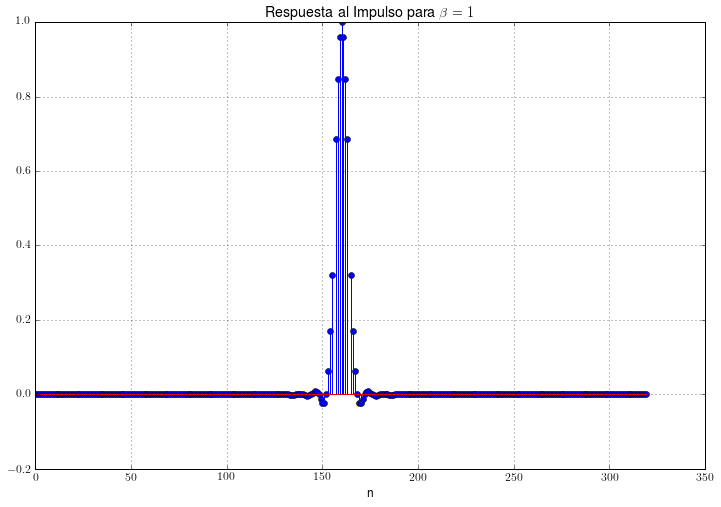

In [88]:

pl.figure(figsize=(12,8))
pl.stem(gn)
pl.title('Respuesta al Impulso para \\beta ='+str(beta));
pl.xlabel('n');
pl.grid()
pl.show()

## Generacion de espectro, salidas y diagrama de ojo para $\beta=1,0.5,0.1$


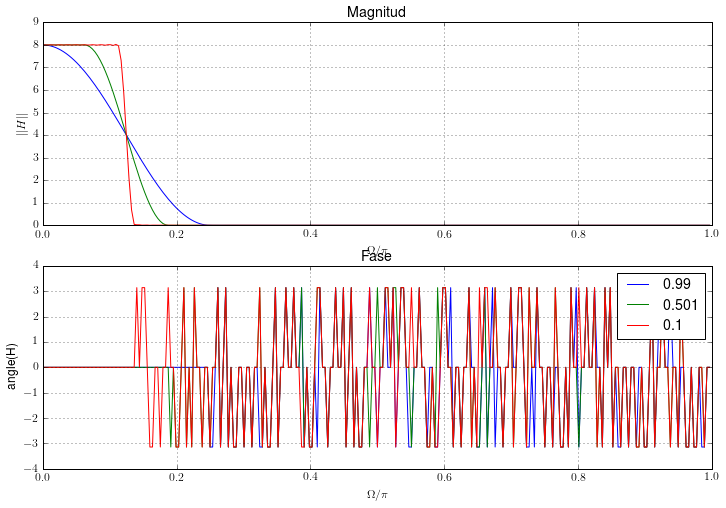

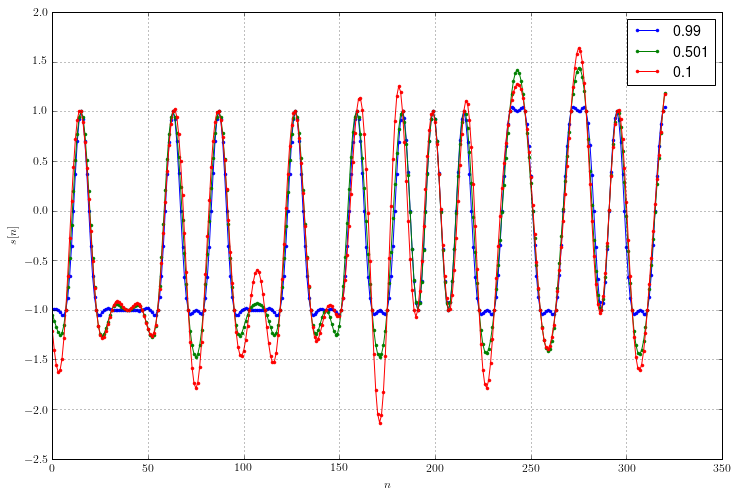

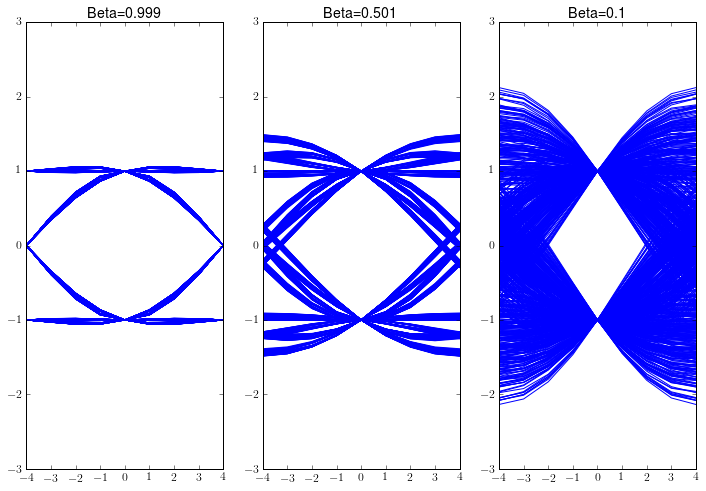

In [90]:
i=1
for b in [0.999,0.501,0.1]:
    beta=b
    gn=gen_filter()
    Omega,H_Mag,H_Fase=sweep_omega()
    pl.figure(1)
    plot_omega()
    
    
    sn=sn_convolve()
    pl.figure(2)
    plot_time(sn)
    
    pl.figure(3)
    pl.subplot(1,3,i)
    pl.ylim([-3,3])
    pl.title("Beta="+str(beta))
    i=i+1
    plot_eye(sn)
    
pl.figure(1)
pl.legend(["0.99","0.501","0.1"])
pl.figure(2)
pl.legend(["0.99","0.501","0.1"])
pl.draw()